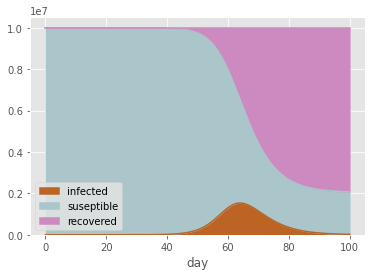

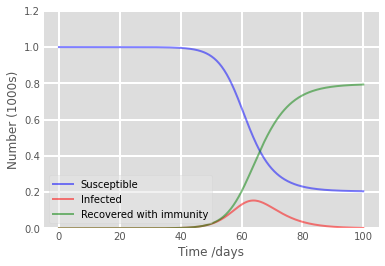

In [24]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N
N = 10000000
# Initial number of infected and recovered individuals, I0 and R0.
I0 = 1 
R0 = 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate: beta, and mean recovery rate: gamma, (in 1/days).
beta = 0.5
gamma = 1/4 
effective_beta = 2
effective_gamma = 1/14
# A grid of time points (in days)
t = np.linspace(0, 100, 360)

# The SIR model differential equations.
def deriv_adjusted(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def adjust_rate(contact_rate, day):
    if day > 60:
        return effective_beta
    else:
        return beta

# Initial conditions vector
y0 = S0, I0, R0


ret = odeint(deriv_adjusted,
             [S0, I0, R0],
             t,
             args=(N, effective_beta, effective_gamma))
S_adj, I_adj, R_adj = ret.T

df = pd.DataFrame({
    'suseptible': S,
    'infected': I,
    'recovered': R,
    'day': t
})

plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'suseptible', 'recovered'],
        color=['#bb6424', '#aac6ca', '#cc8ac0'],
        kind='area',
        stacked=True)

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/10000000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/10000000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/10000000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [13]:
df

,suseptible,infected,recovered,day
0,9.999999e+06,1.000000,0.000000e+00,0.000000
1,9.999999e+06,1.072120,7.211987e-02,0.278552
2,9.999999e+06,1.149441,1.494410e-01,0.557103
3,9.999999e+06,1.232339,2.323386e-01,0.835655
4,9.999998e+06,1.321215,3.212147e-01,1.114206
...,...,...,...,...
355,2.048173e+06,23642.347394,7.928185e+06,98.885794
356,2.047512e+06,22689.971613,7.929798e+06,99.164345
357,2.046878e+06,21775.763808,7.931346e+06,99.442897
358,2.046270e+06,20898.209870,7.932832e+06,99.721448
